In [129]:
# Librerías
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_squared_error,r2_score)
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [64]:
# Definimos una función para graficar resultados de las regresiones lineales
def draw_lm_results(y_test_p, x_test_p, model):
    ref_p = np.linspace(min(y_test_p),max(y_test_p))
    y_predict_p = model.predict(x_test_p)
    fig = plt.figure(figsize=(10,8))
    plt.scatter(y_test_p,y_predict_p)
    plt.plot(ref_p,ref_p,'k--')
    plt.axis('square')
    plt.xlabel('y real'),plt.ylabel('y predict')
    mse_p = mean_squared_error(y_test_p,y_predict_p, squared=False)
    r2_p = r2_score(y_test_p,y_predict_p)
    plt.title(f"Linear regression (original), RMSE={mse_p:.10f}, R^2={r2_p:.10f}")
    plt.grid()
    plt.show()

In [115]:
x_column_names = {"Sector_score","PARA_A","Score_A",
                "Risk_A","PARA_B","Score_B","Risk_B","TOTAL",
                "numbers","Score_B.1","Risk_C","Money_Value",
                "Score_MV","Risk_D","District_Loss","PROB",
                "RiSk_E","History","Prob","Risk_F","Score",
                "Inherent_Risk","CONTROL_RISK","Detection_Risk"}
y_column_name = {"Audit_Risk"}
df_train = pd.read_csv("Audit_train.csv", index_col=0)
df_test = pd.read_csv("Audit_test.csv", index_col=0) # Idx 201-299 (se eliminaron manual 200 y 300)
df_unknown = pd.read_csv("Audit_unknown.csv", index_col=0) # 300-350

En los diagramas de cajas es posible observar que la escala es un problema. 

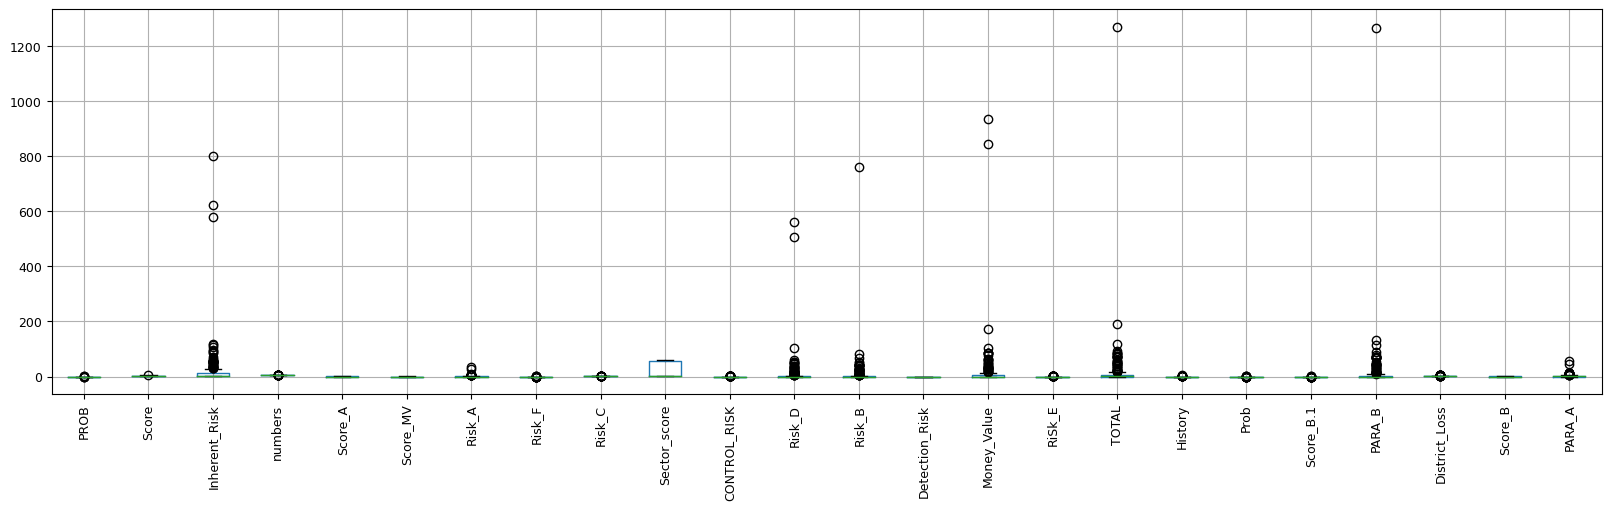

In [98]:
axes, boxplot_dict = pd.DataFrame.boxplot(df_train[x_column_names], return_type='both', fontsize=9, figsize=(20,5), rot=90)
plt.show()

Para proceder con las outliers y no afectar de forma significativa el set de datos, filtramos por los valores que son arriba de 150. 
Vemos que la columna 2 (Inherent_Risk) tiene 3 observaciones con estas características:

In [99]:
def filter_gt_umbral(array, umbral):
    '''
    greater than umbral
    '''
    return [element for element in array if element > umbral]

# Eliminación de outliers. Vamos primero por los valores arriba de 200
umbral = 150
outliers = [filter_gt_umbral(flier.get_ydata(),umbral)  for flier in boxplot_dict["fliers"]]
outliers

[[],
 [],
 [577.508, 801.262, 622.838],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [561.018, 506.622],
 [758.778],
 [],
 [935.03, 173.02, 844.37],
 [],
 [1268.91, 191.36],
 [],
 [],
 [],
 [1264.63],
 [],
 [],
 []]

In [100]:
outliers_inherent_risk = outliers[2]
df_train = df_train[~df_train.Inherent_Risk.isin(outliers_inherent_risk)]
# Resetear indices para evitar problemas en el PCA
df_train = df_train.reset_index(drop=True)
df_train.describe(include='all')

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.0,198.000000
mean,23.102778,2.146619,0.340404,1.165425,8.720952,0.317172,5.099221,10.847621,5.053030,0.220202,...,0.207071,0.494949,0.090909,0.215152,0.043434,2.683838,13.031612,0.538384,0.5,4.281237
std,25.514302,4.245281,0.171833,2.584356,19.967242,0.172200,12.018606,21.939335,0.184325,0.066805,...,0.046725,0.241557,0.441293,0.060226,0.245016,0.837958,23.103234,0.355438,0.0,8.872283
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000
25%,2.370000,0.217500,0.200000,0.043500,0.000000,0.200000,0.000000,0.490000,5.000000,0.200000,...,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.557500,0.400000,0.5,0.311500
50%,3.890000,0.780000,0.200000,0.156000,0.425000,0.200000,0.085000,1.260000,5.000000,0.200000,...,0.200000,0.400000,0.000000,0.200000,0.000000,2.200000,2.207000,0.400000,0.5,0.511200
75%,55.570000,2.297500,0.600000,1.378500,3.497500,0.400000,1.741500,5.997500,5.000000,0.200000,...,0.200000,0.400000,0.000000,0.200000,0.000000,3.200000,11.431500,0.400000,0.5,2.826300
max,59.850000,45.230000,0.600000,27.138000,113.970000,0.600000,68.382000,117.080000,6.500000,0.600000,...,0.600000,1.200000,5.000000,0.600000,3.000000,4.800000,118.850000,3.400000,0.5,52.012000


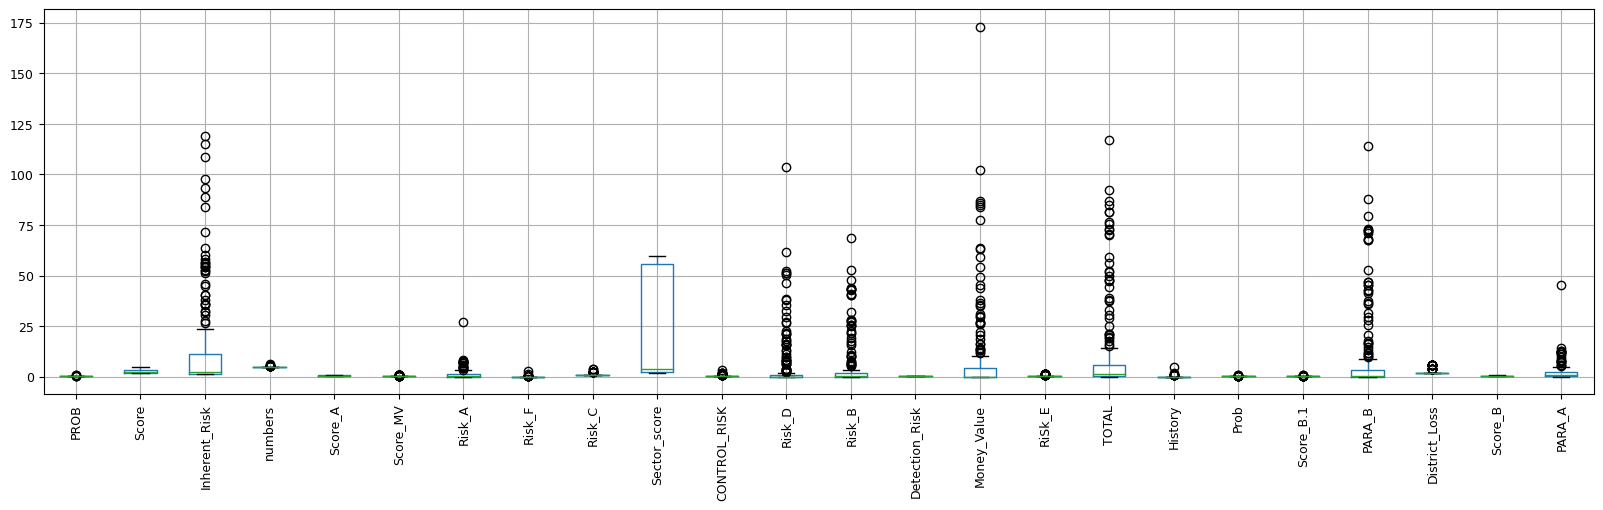

In [101]:
axes, boxplot_dict = pd.DataFrame.boxplot(df_train[x_column_names], return_type='both', fontsize=9, figsize=(20,5), rot=90)
plt.show()

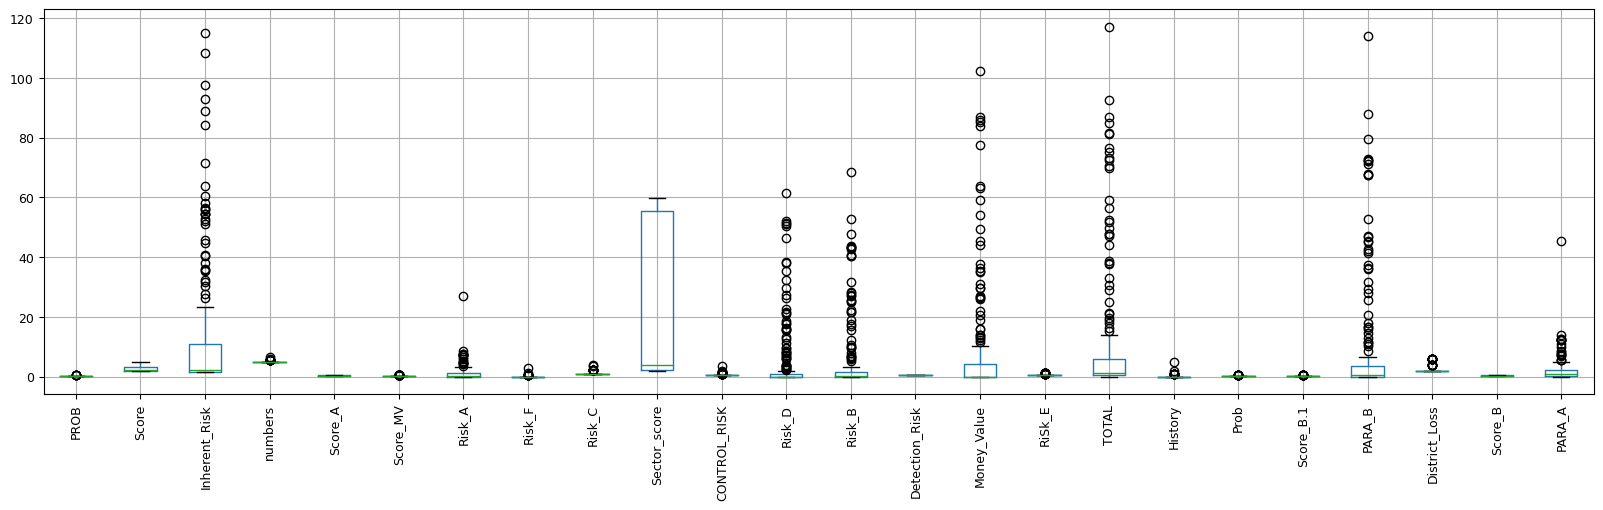

In [102]:
# Aún parecen quedar outliers en Money_Value. Repetimos el proceso, ahora con esa columna. 
outliers_money_value = outliers[14]
df_train = df_train[~df_train.Money_Value.isin(outliers_money_value)]
# Resetear indices para evitar problemas en el PCA
df_train = df_train.reset_index(drop=True)
axes, boxplot_dict = pd.DataFrame.boxplot(df_train[x_column_names], return_type='both', fontsize=9, figsize=(20,5), rot=90)
plt.show()


La escala sigue siendo un problema, a continuación se aborda primero los resultados del modelo sin escalar y luego el escalamiento. 

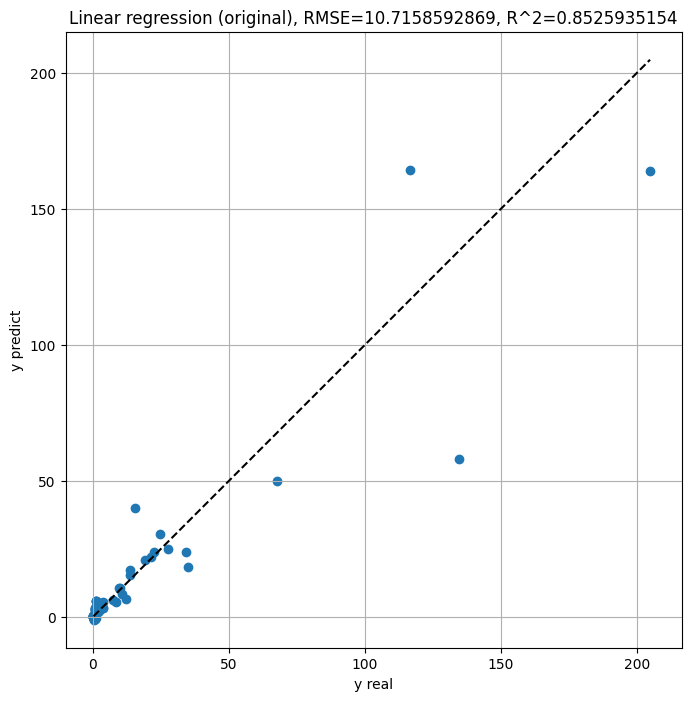

In [103]:
linreg_train = LinearRegression()
linreg_train.fit(df_train[x_column_names],np.array(df_train[y_column_name]))
draw_lm_results(np.array(df_test[y_column_name]), df_test[x_column_names], linreg_train)

In [130]:
# Se aplica un escalamiento robusto ya que utiliza medianas y rango intercuartilico
# Inicializa el escalador robusto
scaler = StandardScaler()

# Ajusta y transforma los datos de entrenamiento
df_to_scal = df_train.copy()
column_names = df_to_scal[x_column_names].columns.tolist()
scaled_data = scaler.fit_transform(df_to_scal[x_column_names])
df_train_scaled = pd.DataFrame(scaled_data, columns=column_names)
# Asignar de vuelta los valores de y
df_train_scaled['Audit_Risk'] = df_to_scal['Audit_Risk']

df_train_scaled.describe(include='all')

,PROB,Score,Inherent_Risk,numbers,Score_A,Score_MV,Risk_A,Risk_F,Risk_C,Sector_score,...,RiSk_E,TOTAL,History,Prob,Score_B.1,PARA_B,District_Loss,Score_B,PARA_A,Audit_Risk
count,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,201.000000,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,...,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,2.010000e+02,201.000000
mean,1.027371e-15,7.953837e-16,8.837596e-18,-3.999012e-16,-4.330422e-16,0.000000,-4.197858e-17,8.837596e-18,1.049465e-16,-8.837596e-18,...,-5.302558e-16,-2.651279e-17,2.651279e-17,-6.186317e-16,-2.742417e-16,-1.767519e-17,7.511957e-17,-1.502391e-16,-3.203629e-17,10.195366
std,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,...,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,1.002497e+00,68.978659
min,-1.505463e-01,-8.268035e-01,-2.565642e-01,-2.954151e-01,-8.339671e-01,-0.572681,-3.907796e-01,-1.905303e-01,-3.031607e-01,-8.255400e-01,...,-3.989413e-01,-1.965596e-01,-2.176486e-01,-2.582287e-01,-3.101680e-01,-1.719508e-01,-3.613179e-01,-6.980895e-01,-4.297760e-01,0.280000
25%,-1.505463e-01,-8.268035e-01,-2.546216e-01,-2.954151e-01,-8.339671e-01,-0.572681,-3.769348e-01,-1.905303e-01,-3.031607e-01,-8.050500e-01,...,-3.989413e-01,-1.912312e-01,-2.176486e-01,-2.582287e-01,-3.101680e-01,-1.719508e-01,-3.613179e-01,-6.980895e-01,-3.878340e-01,0.312400
50%,-1.505463e-01,-3.606394e-01,-2.464913e-01,-2.954151e-01,-8.339671e-01,-0.572681,-3.446303e-01,-1.905303e-01,-3.031607e-01,-7.451562e-01,...,-3.989413e-01,-1.827494e-01,-2.176486e-01,-2.582287e-01,-3.101680e-01,-1.668922e-01,-3.613179e-01,-6.980895e-01,-2.899692e-01,0.549200
75%,-1.505463e-01,5.716888e-01,-1.223784e-01,-2.954151e-01,1.478135e+00,0.651882,2.802519e-02,-1.905303e-01,-3.031607e-01,1.291235e+00,...,-3.989413e-01,-1.185920e-01,-2.176486e-01,-2.582287e-01,-3.101680e-01,-1.262036e-01,-3.613179e-01,1.602173e+00,-6.860445e-03,3.033200
max,8.495115e+00,2.902509e+00,9.335047e+00,7.801645e+00,1.478135e+00,1.876445,9.478821e+00,1.153291e+01,6.519710e+00,1.459883e+00,...,2.874006e+00,1.360175e+01,1.071919e+01,5.848120e+00,5.627334e+00,1.373509e+01,3.097011e+00,1.602173e+00,9.536701e+00,961.514400


In [131]:
# Ajusta y transforma los datos de entrenamiento
df_to_scal = df_test.copy().reset_index(drop=True)

column_names = df_to_scal[x_column_names].columns.tolist()
scaled_data = scaler.fit_transform(df_to_scal[x_column_names])
df_test_scaled = pd.DataFrame(scaled_data, columns=column_names)
# Asignar de vuelta los valores de y
df_test_scaled['Audit_Risk'] = df_to_scal['Audit_Risk']

df_test_scaled.describe(include='all')

,PROB,Score,Inherent_Risk,numbers,Score_A,Score_MV,Risk_A,Risk_F,Risk_C,Sector_score,...,RiSk_E,TOTAL,History,Prob,Score_B.1,PARA_B,District_Loss,Score_B,PARA_A,Audit_Risk
count,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,...,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01,99.000000
mean,2.153440e-15,-4.205390e-16,-7.569702e-17,-4.037175e-17,-1.917658e-16,5.158612e-17,7.850062e-18,5.046468e-18,2.702664e-16,1.379368e-16,...,5.719331e-17,-4.653965e-17,-1.794300e-17,4.339963e-16,-1.962515e-16,-2.018587e-17,-1.513940e-16,1.121437e-16,2.803593e-17,8.773923
std,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,...,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,1.005089e+00,28.052610
min,-1.010153e-01,-8.121779e-01,-2.976855e-01,-2.555281e-01,-8.992381e-01,-5.150006e-01,-3.508492e-01,-2.162390e-01,-3.035923e-01,-7.370844e-01,...,-4.890096e-01,-4.700331e-01,-2.335622e-01,-2.595871e-01,-3.189809e-01,-4.061379e-01,-4.759713e-01,-6.755280e-01,-3.781516e-01,0.280000
25%,-1.010153e-01,-8.121779e-01,-2.936600e-01,-2.555281e-01,-8.992381e-01,-5.150006e-01,-3.393426e-01,-2.162390e-01,-3.035923e-01,-7.151136e-01,...,-4.890096e-01,-4.439268e-01,-2.335622e-01,-2.595871e-01,-3.189809e-01,-4.061379e-01,-4.759713e-01,-6.755280e-01,-3.433983e-01,0.333800
50%,-1.010153e-01,-3.617263e-01,-2.870008e-01,-2.555281e-01,-8.992381e-01,-5.150006e-01,-3.099369e-01,-2.162390e-01,-3.035923e-01,-6.508913e-01,...,-4.890096e-01,-4.100701e-01,-2.335622e-01,-2.595871e-01,-3.189809e-01,-3.867400e-01,-4.759713e-01,-6.755280e-01,-2.545844e-01,0.475600
75%,-1.010153e-01,6.517898e-01,-1.983506e-01,-2.555281e-01,1.354549e+00,-5.150006e-01,-3.122228e-02,-2.162390e-01,-3.035923e-01,1.532668e+00,...,-4.890096e-01,-1.816396e-01,-2.335622e-01,-2.595871e-01,-3.189809e-01,-2.846700e-01,-4.759713e-01,5.629400e-01,-5.636195e-02,2.096600
max,9.899495e+00,2.566209e+00,8.416013e+00,7.839602e+00,1.354549e+00,1.972075e+00,8.787923e+00,7.123530e+00,5.421290e+00,1.713505e+00,...,2.445048e+00,4.258886e+00,6.881103e+00,4.880237e+00,3.628408e+00,4.469204e+00,2.469101e+00,1.801408e+00,8.822458e+00,204.780800


In [132]:
# Ajusta y transforma los datos de entrenamiento
df_to_scal = df_unknown.copy().reset_index(drop=True)

column_names = df_to_scal[x_column_names].columns.tolist()
scaled_data = scaler.fit_transform(df_to_scal[x_column_names])
df_unknown_scaled = pd.DataFrame(scaled_data, columns=column_names)

df_unknown_scaled.describe(include='all')

,PROB,Score,Inherent_Risk,numbers,Score_A,Score_MV,Risk_A,Risk_F,Risk_C,Sector_score,...,Money_Value,RiSk_E,TOTAL,History,Prob,Score_B.1,PARA_B,District_Loss,Score_B,PARA_A
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,...,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
mean,5.551115e-17,-1.306145e-16,-4.353816e-18,9.730778e-16,3.221824e-16,2.307522e-16,4.136125e-17,-1.197299e-17,1.632681e-16,8.272250e-17,...,1.088454e-17,5.703499e-16,3.918434e-17,1.197299e-17,1.143965e-15,9.730778e-16,5.442270e-18,5.877651e-17,1.393221e-16,-7.183796e-17
std,0.000000e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,...,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00
min,5.551115e-17,-7.269763e-01,-4.707767e-01,-2.755891e-01,-7.930906e-01,-4.877131e-01,-4.665632e-01,-1.517057e-01,-2.723612e-01,-9.992136e-01,...,-4.512565e-01,-3.737175e-01,-4.207420e-01,-1.565177e-01,-1.912730e-01,-2.755891e-01,-3.532351e-01,-3.737175e-01,-6.176486e-01,-5.440715e-01
25%,5.551115e-17,-7.269763e-01,-4.570861e-01,-2.755891e-01,-7.930906e-01,-4.877131e-01,-4.655501e-01,-1.517057e-01,-2.723612e-01,-9.514873e-01,...,-4.512565e-01,-3.737175e-01,-3.851716e-01,-1.565177e-01,-1.912730e-01,-2.755891e-01,-3.532351e-01,-3.737175e-01,-6.176486e-01,-5.409750e-01
50%,5.551115e-17,-4.781455e-01,-4.307243e-01,-2.755891e-01,-7.930906e-01,-4.877131e-01,-3.905805e-01,-1.517057e-01,-2.723612e-01,-2.230231e-01,...,-4.512565e-01,-3.737175e-01,-3.565177e-01,-1.565177e-01,-1.912730e-01,-2.755891e-01,-3.156091e-01,-3.737175e-01,-6.176486e-01,-3.118347e-01
75%,5.551115e-17,3.927624e-01,-5.925618e-02,-2.755891e-01,4.708975e-01,-4.877131e-01,-1.808685e-01,-1.517057e-01,-2.723612e-01,1.110956e+00,...,6.532458e-03,-3.737175e-01,-8.924566e-02,-1.565177e-01,-1.912730e-01,-2.755891e-01,-2.301669e-01,-3.737175e-01,5.938929e-01,-1.074664e-01
max,5.551115e-17,2.507824e+00,4.836681e+00,4.409426e+00,1.734886e+00,3.065625e+00,5.371942e+00,7.051699e+00,4.479625e+00,1.279078e+00,...,5.384155e+00,3.438201e+00,5.235445e+00,7.027645e+00,6.312009e+00,4.409426e+00,5.494464e+00,3.438201e+00,1.805434e+00,5.404286e+00


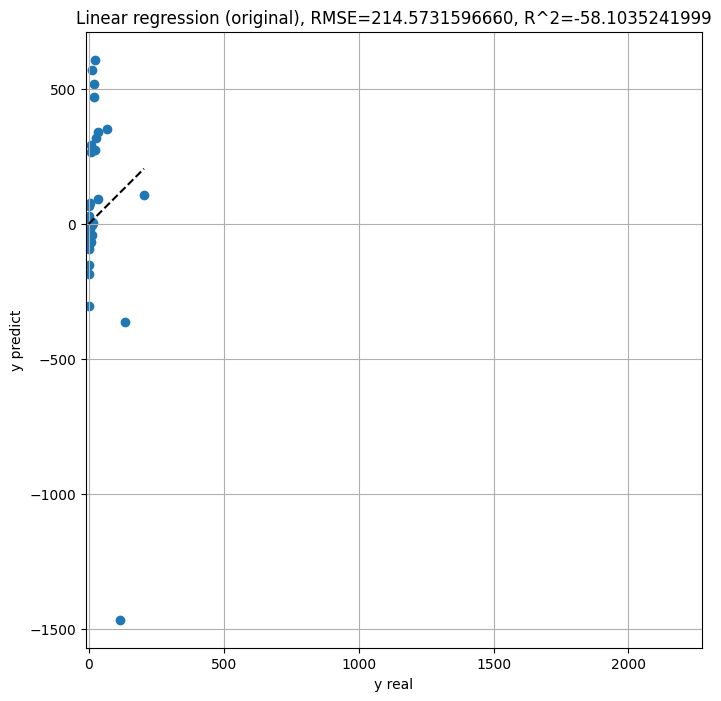

In [133]:
linreg_train_scaled = LinearRegression()
linreg_train_scaled.fit(df_train_scaled[x_column_names],np.array(df_train_scaled[y_column_name]))
draw_lm_results(np.array(df_test_scaled[y_column_name]), df_test_scaled[x_column_names], linreg_train_scaled)

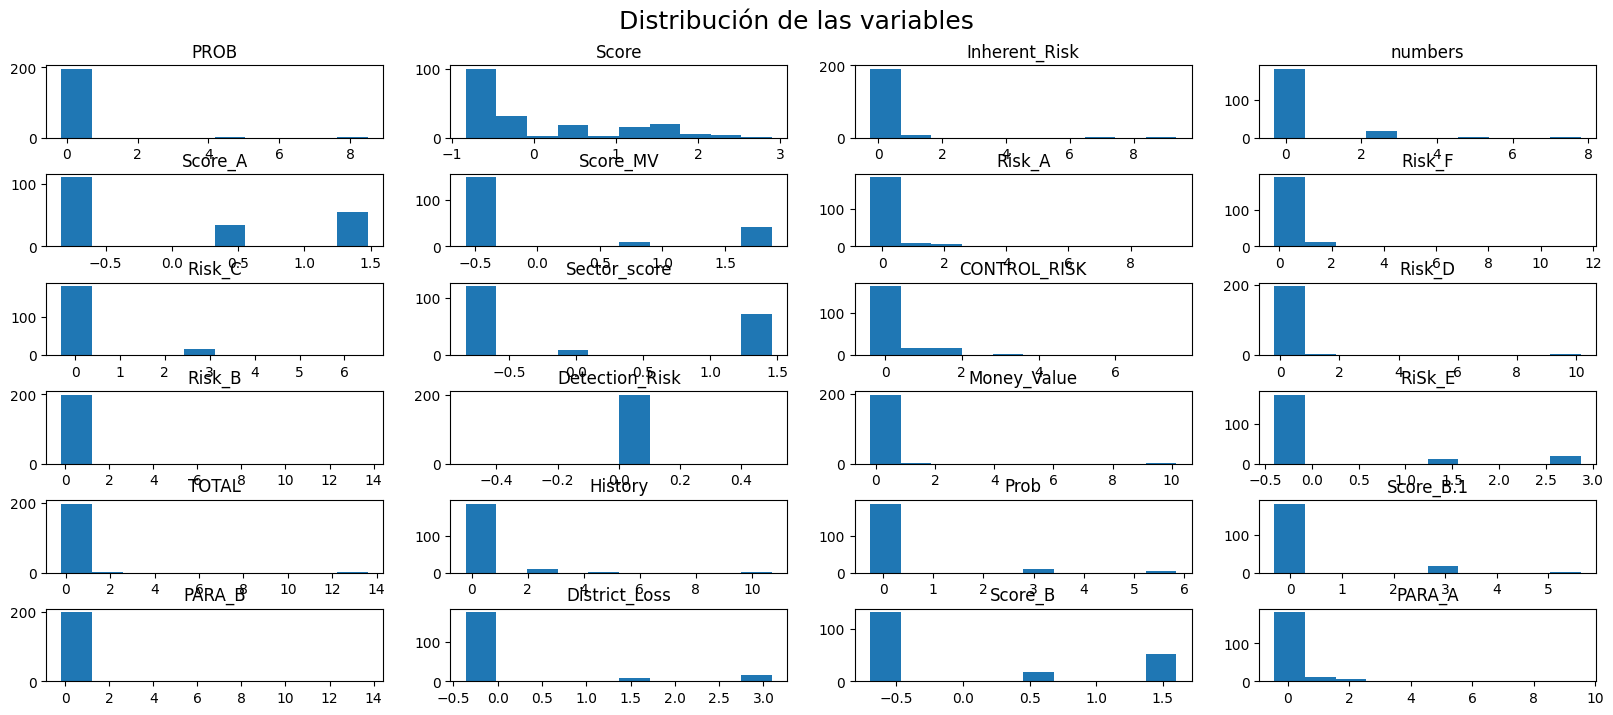

In [135]:
# Imprimir la distribución de las variables
# Se define el grid de la subplot
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(20, 8))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Distribución de las variables", fontsize=18, y=0.95)

for col_name, ax in zip(df_train_scaled.columns, axs.ravel()):
    ax.hist(df_train_scaled[col_name].dropna(), bins=10)
    ax.set_title(col_name)
plt.show()